In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [98]:
def add_bias(X):
    N = X.shape[0]
    V = np.ones((N, X.shape[1]+1))
    V[:, 0:-1] = X
    return V

In [138]:
def train(X, Y, A=None):
    """ X : (N x P) , states
        Y : (N x M) , predictors
        A : (N x N) , weights
    """
    if A is None:
        N = X.shape[0]
        X = add_bias(X)
        P = np.linalg.pinv(np.dot(X.transpose(), X))
        V = np.dot(P, X.transpose())
        w = np.dot(V, Y)
        Y_hat = np.dot(X, w)
        Y_err = np.power((Y - Y_hat), 2.0)
        sigma2 = (1.0/N)*np.sum(Y_err)
        return w, sigma2
    

In [140]:
def predict(X, w, A=None):
    """ X : (N x P) , states
        A : (N x N), weights
    """
    if A is None:
        N = X.shape[0]
        X = add_bias(X)
        Y_hat = np.dot(X, w)
        return Y_hat        

### Generate some data

In [136]:
w = np.array([[1, 1]])

num_samples=100

x = np.linspace(0, 10, num_samples).reshape(num_samples, 1)
x_bias = add_bias(x)

y = np.dot(w, np.transpose(x_bias)) + np.random.normal(0, 0.5, num_samples)
y = y.reshape(num_samples, 1)


### Train

In [142]:
w_train, sigma2_train = train(x, y)

y_hat = predict(x, w_train)


(100, 1)

### Plot example

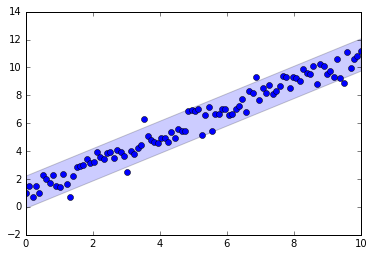

In [151]:
plt.figure()
plt.plot(x, y, 'o')

plt.plot(x, y_hat, '--k')
error = 2*np.sqrt(sigma2_train)
plt.fill_between(x.flatten(), y_hat.flatten()-error, y_hat.flatten()+error, alpha=0.2)

plt.show()
